In [41]:
import minisom
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [42]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [43]:
data = pd.read_csv('data/personagens.csv')
data

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.000000,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.000000,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.000000,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.000000,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.000000,0.011593,Bart
...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.000000,0.000000,6.485412,0.093921,Homer
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.042194,Homer
290,0.000000,0.000000,0.000000,0.000000,4.263629,0.076761,Homer
291,0.000000,0.000000,0.000000,0.000000,1.429134,0.017013,Homer


In [44]:
X = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values

In [45]:
scale = MinMaxScaler(feature_range=(0, 1))
X = scale.fit_transform(X)

In [46]:
X.shape

(293, 6)

In [47]:
som = MiniSom(x=9, y=9, input_len=6, random_seed=0, learning_rate=0.5, sigma=1.0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100000)

In [48]:
y[y == 'Bart'] = 0
y[y == 'Homer'] = 1

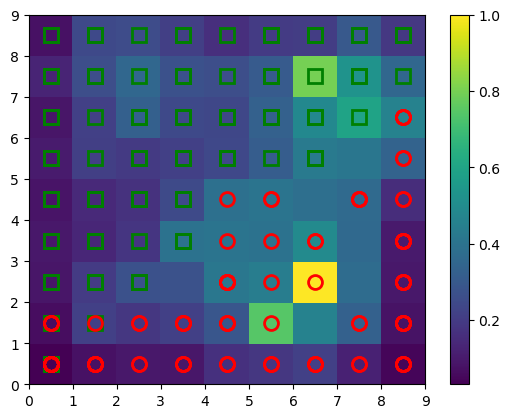

In [49]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]-1],
             markerfacecolor='None', markersize=10,
             markeredgecolor=colors[y[i]-1], markeredgewidth=2)

In [50]:
mapping = som.win_map(X)
suspects = mapping[(6, 2)]
suspects = scale.inverse_transform(suspects)

In [51]:
classe = []
for i in range(len(data)):
    for j in range(len(suspects)):
       if ((data.iloc[i, 0] == suspects[j, 0]) and
           (data.iloc[i, 1] == suspects[j, 1]) and
           (data.iloc[i, 2] == suspects[j, 2]) and
           (data.iloc[i, 3] == suspects[j, 3]) and
           (data.iloc[i, 4] == suspects[j, 4]) and
           (data.iloc[i, 5] == suspects[j, 5])):
           classe.append(data.iloc[i,6])
classe = np.asarray(classe)

In [53]:
suspects_final = np.column_stack((suspects, classe))
suspects_final = suspects_final[suspects_final[:, 4].argsort()]

In [54]:
suspects_final

array([[ 0.       ,  0.       ,  0.       , 21.512486 ,  3.0598493,
         4.9179544,  1.       ]])